### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

/Users/yoonhokim/miniforge3/envs/tensorflow/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Import data

- movie

when you work on specific data frames, just use movie or rating rather than the combined one for now. 

In [2]:
movie = pd.read_pickle('../assets/movie.pkl')

In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45528 entries, 0 to 45527
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   45528 non-null  object 
 1   original_title       45528 non-null  object 
 2   action               45525 non-null  float64
 3   adventure            45525 non-null  float64
 4   animation            45525 non-null  float64
 5   comedy               45525 non-null  float64
 6   crime                45525 non-null  float64
 7   documentary          45525 non-null  float64
 8   drama                45525 non-null  float64
 9   family               45525 non-null  float64
 10  fantasy              45525 non-null  float64
 11  fiction              45525 non-null  float64
 12  foreign              45525 non-null  float64
 13  genre_not_specified  45525 non-null  float64
 14  history              45525 non-null  float64
 15  horror               45525 non-null 

In [20]:
np.sum(movie, axis = 1).describe()

count    45528.000000
mean         2.142110
std          1.167751
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
dtype: float64

/Users/yoonhokim/miniforge3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)
/var/folders/t9/5hgq421x4xsgvkp8nd2kx4fw0000gn/T/ipykernel_1509/1973286955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sum(movie, axis = 1))


<AxesSubplot:ylabel='Density'>

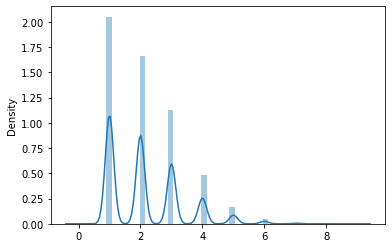

In [21]:
sns.distplot(np.sum(movie, axis = 1))

In [4]:
genre_counts =  pd.DataFrame(np.sum(movie, axis = 0)[2:]).reset_index()\
.rename(columns = {'index': 'genre', 0:'counts'})\
.sort_values(by = 'counts', ascending = False)

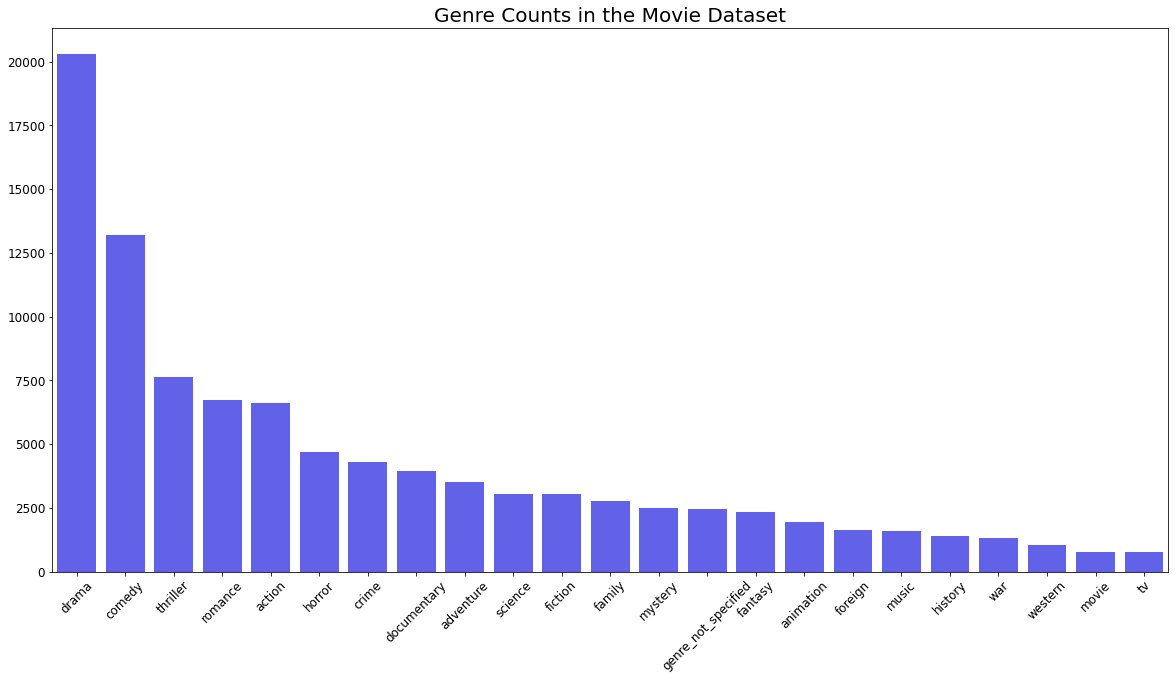

In [18]:
plt.figure(figsize = (20, 10))
plt.title("Genre Counts in the Movie Dataset", fontsize = 20)
sns.barplot(data = genre_counts,
            x = 'genre',
            y = 'counts',
            color = 'blue',
            alpha = 0.7)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 12,
           rotation = 45)
plt.yticks(fontsize = 12);

In [12]:
df = pd.read_pickle('../assets/df.pkl')

In [13]:
len(df)

11477723

### Movie

In [14]:
df.head()

,adult,budget,id,original_title,overview,popularity,revenue,runtime,genre_unlisted,userId,rating,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,genre_not_specified,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,False,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",1923.0,3.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",2103.0,5.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",5380.0,1.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,False,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",6177.0,4.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,False,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",6525.0,4.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df.columns

Index(['adult', 'budget', 'id', 'original_title', 'overview', 'popularity',
       'revenue', 'runtime', 'genre_unlisted', 'userId', 'rating', 'action',
       'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'fiction', 'foreign', 'genre_not_specified',
       'history', 'horror', 'movie', 'music', 'mystery', 'romance', 'science',
       'thriller', 'tv', 'war', 'western'],
      dtype='object')

In [35]:
len(df[df.rating.isnull()])

37948

In [38]:
len(df[~df.rating.isnull()])

11439775

In [5]:
df.columns

Index(['adult', 'budget', 'id', 'original_title', 'overview', 'popularity',
       'revenue', 'runtime', 'genre_unlisted', 'userId', 'rating', 'action',
       'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'fiction', 'foreign', 'genre_not_specified',
       'history', 'horror', 'movie', 'music', 'mystery', 'romance', 'science',
       'thriller', 'tv', 'war', 'western'],
      dtype='object')

In [17]:
movie_features = ['id', 'original_title', 'adult', 'overview', 'popularity', 
                  'revenue', 'runtime', 'genre_unlisted', 'action', 'adventure',
                  'animation', 'comedy', 'crime', 'documentary', 'drama', 'family',
                  'fantasy', 'fiction', 'foreign', 'genre_not_specified', 'history',
                  'horror', 'movie', 'music', 'mystery', 'romance', 'science',
                  'thriller', 'tv', 'war', 'western']

In [18]:
movie_df = df[movie_features]

In [19]:
movie_df.drop_duplicates(subset = ['id'], inplace = True)

/Users/yoonhokim/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


drop duplicate values

In [9]:
movie_df = movie_df.reset_index().drop(columns = ['index'])

In [10]:
movie_df.head()

,id,original_title,adult,overview,popularity,revenue,runtime,genre_unlisted,action,adventure,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,862,Toy Story,False,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",0,0,...,0,0,0,0,0,0,0,0,0,0
1,8844,Jumanji,False,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,"Adventure, Fantasy, Family",0,1,...,0,0,0,0,0,0,0,0,0,0
2,15602,Grumpier Old Men,False,A family wedding reignites the ancient feud be...,11.7129,0.0,101.0,"Romance, Comedy",0,0,...,0,0,0,0,1,0,0,0,0,0
3,31357,Waiting to Exhale,False,"Cheated on, mistreated and stepped on, the wom...",3.859495,81452156.0,127.0,"Comedy, Drama, Romance",0,0,...,0,0,0,0,1,0,0,0,0,0
4,11862,Father of the Bride Part II,False,Just when George Banks has recovered from his ...,8.387519,76578911.0,106.0,Comedy,0,0,...,0,0,0,0,0,0,0,0,0,0


### User

In [11]:
df.head()

,adult,budget,id,original_title,overview,popularity,revenue,runtime,genre_unlisted,userId,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,False,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",1923.0,...,0,0,0,0,0,0,0,0,0,0
1,False,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",2103.0,...,0,0,0,0,0,0,0,0,0,0
2,False,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",5380.0,...,0,0,0,0,0,0,0,0,0,0
3,False,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",6177.0,...,0,0,0,0,0,0,0,0,0,0
4,False,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,"Animation, Comedy, Family",6525.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.columns

Index(['adult', 'budget', 'id', 'original_title', 'overview', 'popularity',
       'revenue', 'runtime', 'genre_unlisted', 'userId', 'rating', 'action',
       'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'fiction', 'foreign', 'genre_not_specified',
       'history', 'horror', 'movie', 'music', 'mystery', 'romance', 'science',
       'thriller', 'tv', 'war', 'western'],
      dtype='object')

In [9]:
user_features = ['id', 'original_title', 'popularity', 'userId', 'rating']

In [10]:
user_df = df[user_features]

In [11]:
user_df.head()

,id,original_title,popularity,userId,rating
0,862,Toy Story,21.946943,1923.0,3.0
1,862,Toy Story,21.946943,2103.0,5.0
2,862,Toy Story,21.946943,5380.0,1.0
3,862,Toy Story,21.946943,6177.0,4.0
4,862,Toy Story,21.946943,6525.0,4.0


In [12]:
user_df.rating.isnull().sum()

37948

In [14]:
non_missing_rating = user_df[~user_df.rating.isnull()]

In [16]:
non_missing_rating.original_title.nunique()

7462

In [21]:
non_missing_rating.id.nunique()

7565

In [25]:
non_missing_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11439775 entries, 0 to 11477719
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   original_title  object 
 2   popularity      object 
 3   userId          float64
 4   rating          float64
dtypes: float64(2), object(3)
memory usage: 523.7+ MB


In [28]:
non_missing_rating.loc[:, 'popularity'] = non_missing_rating.popularity.apply(lambda pop: float(pop))

/Users/yoonhokim/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [29]:
non_missing_rating.popularity.describe()

count    1.143978e+07
mean     8.028415e+00
std      6.590341e+00
min      0.000000e+00
25%      2.967672e+00
50%      7.505268e+00
75%      1.141632e+01
max      1.409502e+02
Name: popularity, dtype: float64

In [30]:
np.min(non_missing_rating.popularity)

0.0

In [ ]:
np.min(non_missing_rating.popularity)

In [22]:
non_missing_rating.groupby(['id']).mean()['rating']

id
100       3.232304
100010    2.522727
100017    3.100000
100032    3.600000
100042    3.333333
            ...   
99861     3.296296
99875     3.148148
99904     2.071429
99922     3.000000
99946     3.600000
Name: rating, Length: 7565, dtype: float64